<a href="https://colab.research.google.com/github/tonyyoung3/data_analytics/blob/main/greedindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import requests
from bs4 import BeautifulSoup
import json




# Make an HTTP request to the website
url = 'https://production.dataviz.cnn.io/index/fearandgreed/graphdata/2021-10-06'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Content-Type': 'application/json',
    'Authorization': 'Bearer <token>'
}

response = requests.get(url, headers=headers)


In [14]:
response.text

'{"fear_and_greed":{"score":23.5881533101045,"rating":"extreme fear","timestamp":"2023-10-05T23:59:42+00:00","previous_close":18.6352733686067,"previous_1_week":28.6285714285714,"previous_1_month":58.2285714285714,"previous_1_year":29.714285714285715},"fear_and_greed_historical":{"timestamp":1696550382000.0,"score":23.5881533101045,"rating":"extreme fear","data":[{"x":1633478400000.0,"y":20.066666666666666,"rating":"extreme fear"},{"x":1633564800000.0,"y":24.600000000000005,"rating":"extreme fear"},{"x":1633651200000.0,"y":25.26666666666667,"rating":"fear"},{"x":1633910400000.0,"y":25.900000000000002,"rating":"fear"},{"x":1633996800000.0,"y":22.7,"rating":"extreme fear"},{"x":1634083200000.0,"y":24.100000000000005,"rating":"extreme fear"},{"x":1634169600000.0,"y":31.833333333333332,"rating":"fear"},{"x":1634256000000.0,"y":43.63333333333333,"rating":"fear"},{"x":1634515200000.0,"y":46.56666666666666,"rating":"neutral"},{"x":1634601600000.0,"y":53.400000000000006,"rating":"neutral"},{"x

In [16]:
import pandas as pd

data =  json.loads(response.text)

In [18]:
data = pd.DataFrame(data)

In [19]:
data

,fear_and_greed,fear_and_greed_historical,market_momentum_sp500,market_momentum_sp125,stock_price_strength,stock_price_breadth,put_call_options,market_volatility_vix,market_volatility_vix_50,junk_bond_demand,safe_haven_demand
score,23.588153,23.588153,31.4,31.4,0.4,0,8.8,32.317073,32.317073,84.4,7.8
rating,extreme fear,extreme fear,fear,fear,extreme fear,extreme fear,extreme fear,fear,fear,extreme greed,extreme fear
timestamp,2023-10-05T23:59:42+00:00,1696550382000.0,1696540999000.0,1696540999000.0,1696550382000.0,1696550382000.0,1696537766000.0,1696536901000.0,1696536901000.0,1696545000000.0,1696535999000.0
previous_close,18.635273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_1_week,28.628571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_1_month,58.228571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_1_year,29.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data,NaN,"[{'x': 1633478400000.0, 'y': 20.06666666666666...","[{'x': 1633478400000.0, 'y': 4363.55, 'rating'...","[{'x': 1633478400000.0, 'y': 4315.55608, 'rati...","[{'x': 1633478400000.0, 'y': 0.775780106369180...","[{'x': 1633478400000.0, 'y': 664.7983830578736...","[{'x': 1633478400000.0, 'y': 0.694455825186469...","[{'x': 1633478400000.0, 'y': 21.0, 'rating': '...","[{'x': 1633478400000.0, 'y': 18.8276, 'rating'...","[{'x': 1633478400000.0, 'y': 1.8981, 'rating':...","[{'x': 1633478400000.0, 'y': -1.42822848717688..."


In [22]:
filtered_data = data[['fear_and_greed_historical']].loc["data"]

In [30]:
filtered_data[0]


[{'x': 1633478400000.0, 'y': 20.066666666666666, 'rating': 'extreme fear'},
 {'x': 1633564800000.0, 'y': 24.600000000000005, 'rating': 'extreme fear'},
 {'x': 1633651200000.0, 'y': 25.26666666666667, 'rating': 'fear'},
 {'x': 1633910400000.0, 'y': 25.900000000000002, 'rating': 'fear'},
 {'x': 1633996800000.0, 'y': 22.7, 'rating': 'extreme fear'},
 {'x': 1634083200000.0, 'y': 24.100000000000005, 'rating': 'extreme fear'},
 {'x': 1634169600000.0, 'y': 31.833333333333332, 'rating': 'fear'},
 {'x': 1634256000000.0, 'y': 43.63333333333333, 'rating': 'fear'},
 {'x': 1634515200000.0, 'y': 46.56666666666666, 'rating': 'neutral'},
 {'x': 1634601600000.0, 'y': 53.400000000000006, 'rating': 'neutral'},
 {'x': 1634688000000.0, 'y': 56.56666666666667, 'rating': 'greed'},
 {'x': 1634774400000.0, 'y': 60.199999999999996, 'rating': 'greed'},
 {'x': 1634860800000.0, 'y': 59.5, 'rating': 'greed'},
 {'x': 1635120000000.0, 'y': 62.96666666666667, 'rating': 'greed'},
 {'x': 1635206400000.0, 'y': 63.0333333

In [27]:
string_data = filtered_data.to_string()


In [28]:
string_data

"fear_and_greed_historical    [{'x': 1633478400000.0, 'y': 20.06666666666666..."

In [43]:
filt = pd.DataFrame(filtered_data[0])
filt

,x,y,rating
0,1.633478e+12,20.066667,extreme fear
1,1.633565e+12,24.600000,extreme fear
2,1.633651e+12,25.266667,fear
3,1.633910e+12,25.900000,fear
4,1.633997e+12,22.700000,extreme fear
...,...,...,...
499,1.696205e+12,19.807143,extreme fear
500,1.696291e+12,17.577072,extreme fear
501,1.696378e+12,23.385366,extreme fear
502,1.696464e+12,23.588153,extreme fear


In [44]:
filt['change'] = filt['y'] .diff()
filt['change']

0           NaN
1      4.533333
2      0.666667
3      0.633333
4     -3.200000
         ...   
499   -5.671429
500   -2.230071
501    5.808294
502    0.202787
503    0.000000
Name: change, Length: 504, dtype: float64

In [56]:
movement = filt['change'].tolist()
movement


def consecutive_same_move(data):
  same_dir_days_pos = []
  same_dir_days_neg = []

  count = 0
  flag = 0
  for i in data[1:]:
    if count == 0 :
      count += 1
      if i >= 0 :
        flag = 1
      else :
        flag = -1
    if flag * i >=0: #same direction
      count+=1
    else : # direction change
      if flag < 0 :
        same_dir_days_neg.append(count)
      else:
        same_dir_days_pos.append(count)
      count = 1 #reset
      flag = flag * -1 #change direction
    return same_dir_days_pos, same_dir_days_neg


4.5333333333333385
0.6666666666666643
0.6333333333333329
-3.200000000000003
1.4000000000000057
7.733333333333327
11.8
2.93333333333333
6.833333333333343
3.1666666666666643
3.6333333333333258
-0.6999999999999957
3.4666666666666686
0.06666666666666998
-4.700000000000003
6.06666666666667
1.0333333333333314
0.7000000000000028
2.1333333333333258
3.933333333333337
0.23333333333333428
1.1666666666666714
0.9333333333333371
2.6380952380952323
-4.085714285714289
-0.8571428571428612
1.7714285714285722
-2.3714285714285523
0.8571428571428328
-3.2857142857142776
0.9428571428571502
-7.371428571428567
-2.7714285714285865
0.37142857142857366
-3.4285714285714306
-25.685714285714283
6.857142857142854
-13.342857142857142
0.5857142857142854
-2.4285714285714306
-2.771428571428565
1.0999999999999979
16.628571428571433
3.4285714285714306
-4.4571428571428555
5.142857142857132
-6.600000000000001
-3.857142857142854
6.25714285714286
-4.228571428571428
-1.057142857142857
-3.0857142857142925
4.599999999999998
5.514

In [57]:
same_dir_days_pos
same_dir_days_neg

[1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 8,
 2,
 2,
 3,
 3,
 3,
 1,
 1,
 2,
 6,
 5,
 2,
 7,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 4,
 1,
 4,
 3,
 1,
 1,
 1,
 5,
 3,
 4,
 1,
 2,
 6,
 1,
 5,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 6,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 6,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 6,
 1,
 3,
 1,
 1,
 4,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 2,
 2,
 3,
 5,
 3]

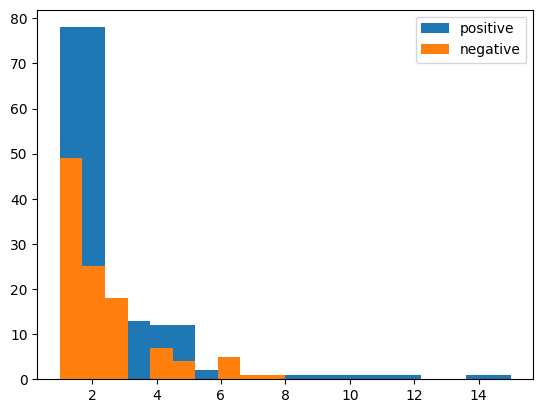

In [61]:
plt.hist(same_dir_days_pos, label = 'positive')
plt.hist(same_dir_days_neg, label = 'negative')
plt.legend()
plt.show()

In [33]:
filt['y']


0      20.066667
1      24.600000
2      25.266667
3      25.900000
4      22.700000
         ...    
499    19.807143
500    17.577072
501    23.385366
502    23.588153
503    23.588153
Name: y, Length: 504, dtype: float64

In [34]:
import matplotlib.pyplot as plt

In [65]:
filt['y'].describe()


count    504.000000
mean      47.998231
std       19.321098
min        3.200000
25%       30.792857
50%       49.828571
75%       63.008333
max       84.314286
Name: y, dtype: float64

(array([ 6., 36., 58., 49., 59., 55., 79., 85., 39., 38.]),
 array([ 3.2       , 11.31142857, 19.42285714, 27.53428571, 35.64571429,
        43.75714286, 51.86857143, 59.98      , 68.09142857, 76.20285714,
        84.31428571]),
 <BarContainer object of 10 artists>)

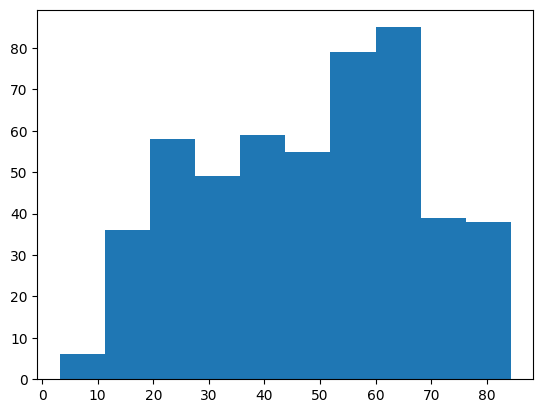

In [35]:
plt.hist(filt['y'], bins = 10)

In [67]:
filt['rating']

0      extreme fear
1      extreme fear
2              fear
3              fear
4      extreme fear
           ...     
499    extreme fear
500    extreme fear
501    extreme fear
502    extreme fear
503    extreme fear
Name: rating, Length: 504, dtype: object

(array([ 80.,   0., 135.,   0.,   0.,  75.,   0., 171.,   0.,  43.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

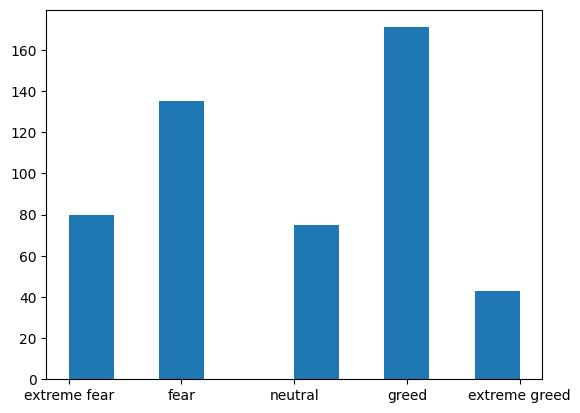

In [66]:
plt.hist(filt['rating'], bins = 10)

In [63]:
import scipy.stats as stats


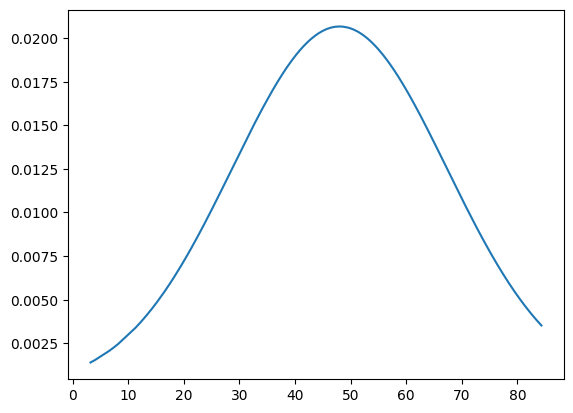

In [64]:
pdf = stats.norm.pdf(filt['y'].sort_values(), np.mean(filt['y']), np.std(filt['y']))

plt.plot(filt['y'].sort_values(), pdf)

In [37]:
import numpy as np
# Sort the data
sorted_data = np.sort(filt['y'])
sorted_data


array([ 3.2       ,  4.02857143,  6.6       ,  7.4       ,  8.18571429,
       11.28571429, 11.74285714, 12.24285714, 12.65714286, 13.12857143,
       13.25714286, 13.27142857, 13.71428571, 14.32857143, 15.2       ,
       15.94285714, 16.        , 16.27142857, 16.45714286, 16.45714286,
       16.51428571, 16.67142857, 16.88571429, 16.9       , 16.92857143,
       17.02857143, 17.5       , 17.57142857, 17.57707231, 17.62857143,
       17.7       , 17.82857143, 17.88571429, 17.9       , 17.95714286,
       18.02857143, 18.17142857, 18.6       , 18.81428571, 19.05714286,
       19.37142857, 19.4       , 19.51428571, 19.67142857, 19.72857143,
       19.80714286, 20.06666667, 20.15714286, 20.38571429, 20.52857143,
       20.88571429, 21.22857143, 21.25714286, 21.68571429, 21.72857143,
       21.85714286, 22.17142857, 22.4       , 22.68571429, 22.7       ,
       22.82857143, 22.92857143, 22.97142857, 23.12857143, 23.14285714,
       23.35714286, 23.38536585, 23.4       , 23.58815331, 23.58

In [39]:
# Create an array of evenly spaced percentiles
percentiles = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100
percentiles

array([  0.1984127 ,   0.3968254 ,   0.5952381 ,   0.79365079,
         0.99206349,   1.19047619,   1.38888889,   1.58730159,
         1.78571429,   1.98412698,   2.18253968,   2.38095238,
         2.57936508,   2.77777778,   2.97619048,   3.17460317,
         3.37301587,   3.57142857,   3.76984127,   3.96825397,
         4.16666667,   4.36507937,   4.56349206,   4.76190476,
         4.96031746,   5.15873016,   5.35714286,   5.55555556,
         5.75396825,   5.95238095,   6.15079365,   6.34920635,
         6.54761905,   6.74603175,   6.94444444,   7.14285714,
         7.34126984,   7.53968254,   7.73809524,   7.93650794,
         8.13492063,   8.33333333,   8.53174603,   8.73015873,
         8.92857143,   9.12698413,   9.32539683,   9.52380952,
         9.72222222,   9.92063492,  10.11904762,  10.31746032,
        10.51587302,  10.71428571,  10.91269841,  11.11111111,
        11.30952381,  11.50793651,  11.70634921,  11.9047619 ,
        12.1031746 ,  12.3015873 ,  12.5       ,  12.69

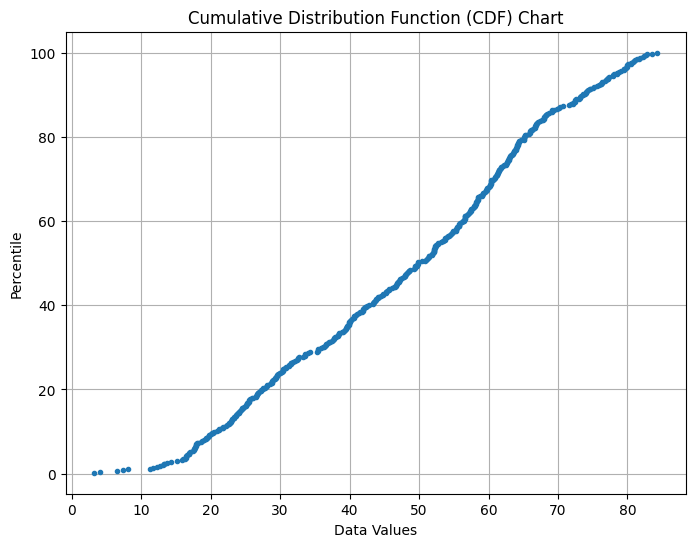

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, percentiles, marker='.', linestyle='none')
plt.xlabel('Data Values')
plt.ylabel('Percentile')
plt.title('Cumulative Distribution Function (CDF) Chart')

plt.grid(True)
plt.show()